Load and Inspect the Dataset

In [1]:
# Import necessary libraries
import pandas as pd


file_path = '/content/Titanic dataset.csv'
titanic_data = pd.read_csv(file_path)

print("First 5 rows of the dataset:")
print(titanic_data.head())

print("\nDataset Information:")
print(titanic_data.info())

print("\nSummary Statistics:")
print(titanic_data.describe(include='all'))

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  

Dataset Information:
<class 'pandas.core.frame.DataFrame

Data Cleaning and Preprocessing

In [2]:
# Step 2: Data Cleaning and Preprocessing


titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())


titanic_data = titanic_data.drop(columns=['Cabin'])


titanic_data['Fare'] = titanic_data['Fare'].fillna(titanic_data['Fare'].median())


titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


titanic_data = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket'])

# Verify the cleaned data
print("Cleaned Data Sample:")
print(titanic_data.head())
print("\nUpdated Data Info:")
print(titanic_data.info())

Cleaned Data Sample:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  34.5      0      0   7.8292         1
1         1       3    1  47.0      1      0   7.0000         2
2         0       2    0  62.0      0      0   9.6875         1
3         0       3    0  27.0      0      0   8.6625         2
4         1       3    1  22.0      1      1  12.2875         2

Updated Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB
None


Exploratory Data Analysis

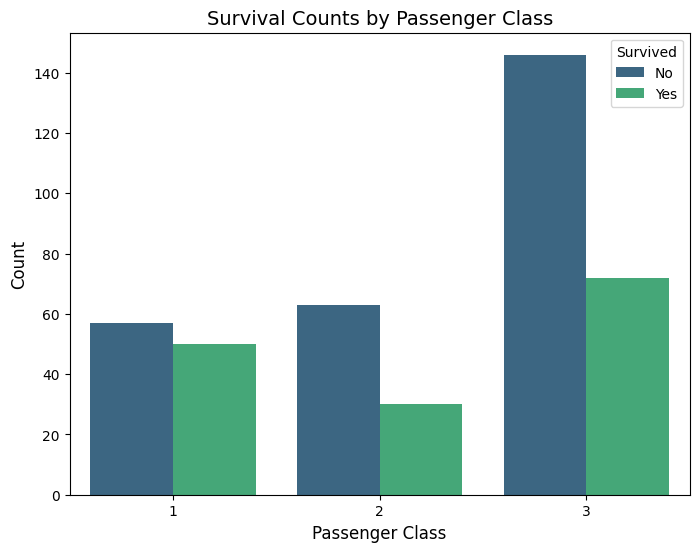

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Pclass', hue='Survived', palette='viridis')
plt.title('Survival Counts by Passenger Class', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Numerical Visualization (Histogram for Age)

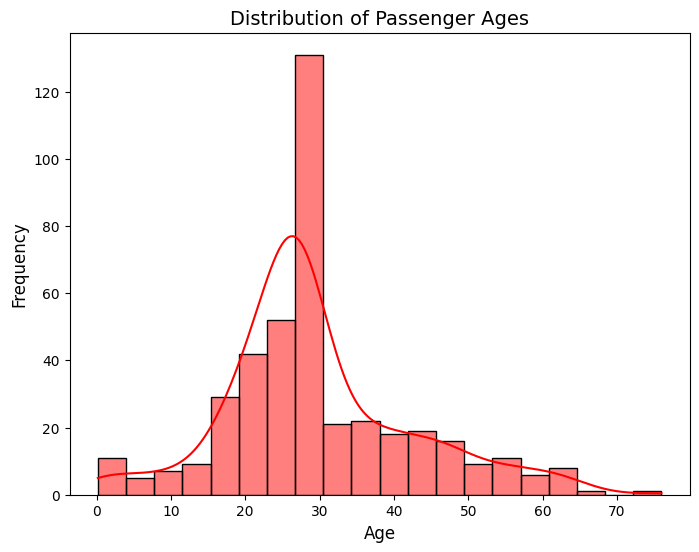

In [5]:
# Histogram: Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(titanic_data['Age'], bins=20, kde=True, color='red')
plt.title('Distribution of Passenger Ages', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Relational Visualization (Scatter Plot of Fare vs. Age)

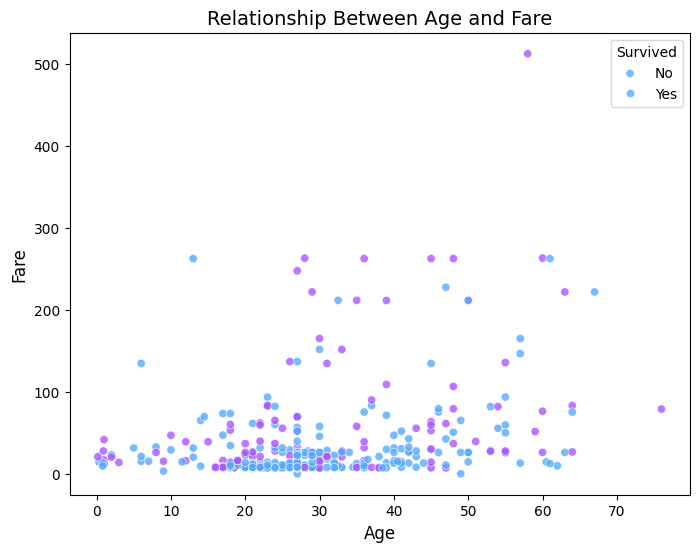

In [6]:
# Scatter plot: Fare vs. Age
plt.figure(figsize=(8, 6))
sns.scatterplot(data=titanic_data, x='Age', y='Fare', hue='Survived', palette='cool', alpha=0.8)
plt.title('Relationship Between Age and Fare', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Statistical Visualization (Box Plot of Fare Across Survival Status)

<ipython-input-7-dad649a6e9ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic_data, x='Survived', y='Fare', palette='cool')


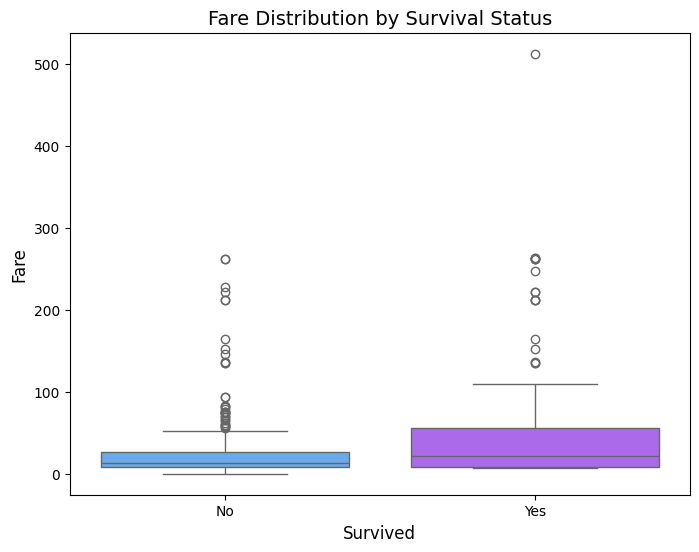

In [7]:
# Box plot: Fare across Survival Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic_data, x='Survived', y='Fare', palette='cool')
plt.title('Fare Distribution by Survival Status', fontsize=14)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Heatmap of Correlation Matrix

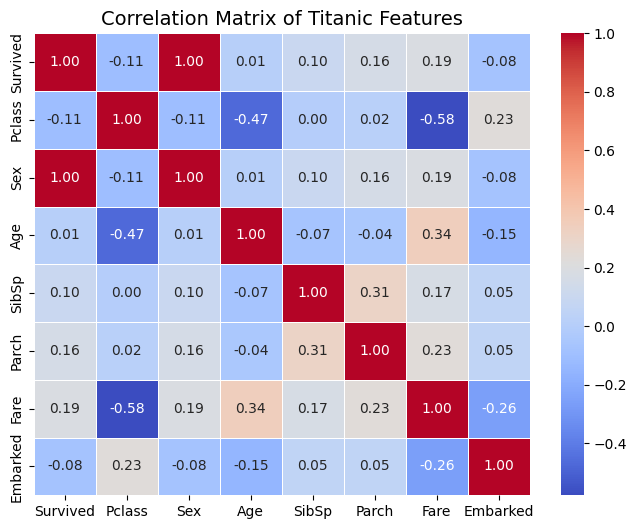

In [8]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(titanic_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Titanic Features', fontsize=14)
plt.show()

CLustering



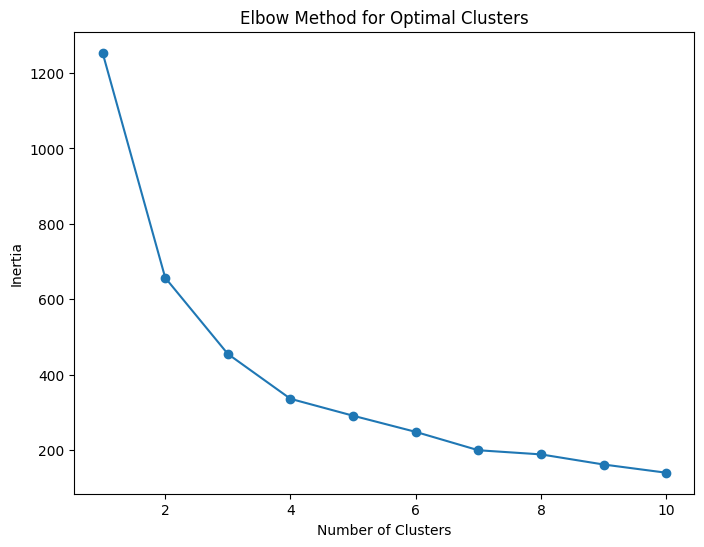

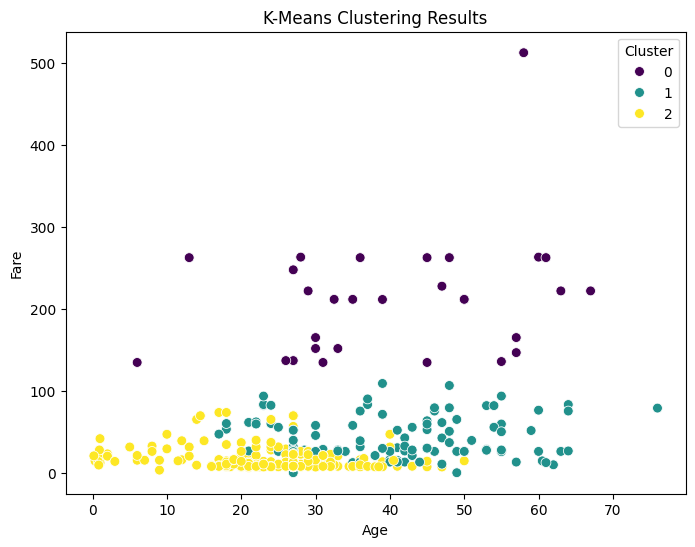

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

features = titanic_data[['Age', 'Fare', 'Pclass']].dropna()
# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

features['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=features['Age'], y=features['Fare'], hue=features['Cluster'], palette='viridis', s=50
)
plt.title('K-Means Clustering Results')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Cluster')
plt.show()

Regression Analysis

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
R² Score: 0.11
Mean Squared Error: 3310.78


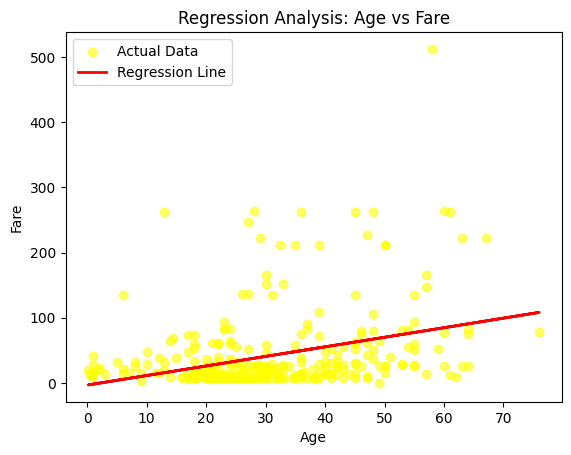

In [14]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

# Ensure the Titanic dataset is loaded into a DataFrame named 'df'
import pandas as pd

# Replace 'your_dataset.csv' with the correct path to your Titanic dataset
df = pd.read_csv('Titanic dataset.csv')

# Check the first few rows to ensure it is loaded correctly
print(df.head())


# Filter rows with non-null Age and Fare
regression_data = df[['Age', 'Fare']].dropna()

X = regression_data[['Age']].values
y = regression_data['Fare'].values

# Create and fit the regression model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Predictions
y_pred = reg_model.predict(X)

# Calculate model evaluation metrics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Plot regression line with actual data
plt.scatter(X, y, label="Actual Data", color='yellow', alpha=0.6)
plt.plot(X, y_pred, label="Regression Line", color='red', linewidth=2)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Regression Analysis: Age vs Fare")
plt.legend()
plt.show()

Make Future Predictions

Predicted Fare for Age 0.0: $-3.29
Predicted Fare for Age 8.9: $9.75
Predicted Fare for Age 17.8: $22.79
Predicted Fare for Age 26.7: $35.83
Predicted Fare for Age 35.6: $48.87
Predicted Fare for Age 44.4: $61.91
Predicted Fare for Age 53.3: $74.95
Predicted Fare for Age 62.2: $87.99
Predicted Fare for Age 71.1: $101.03
Predicted Fare for Age 80.0: $114.06


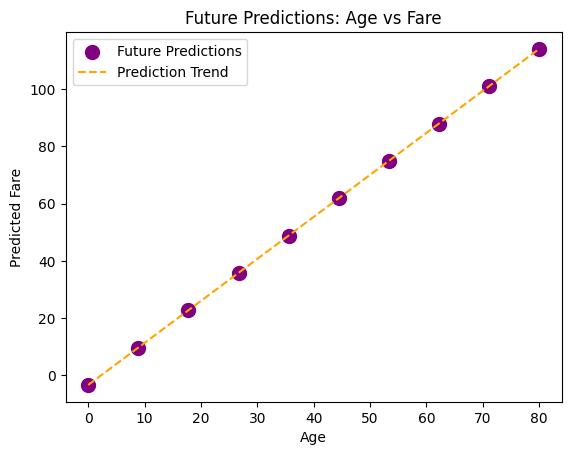

In [15]:

future_ages = np.linspace(0, 80, 10).reshape(-1, 1)


future_fares = reg_model.predict(future_ages)

# Print predictions
for age, fare in zip(future_ages.flatten(), future_fares):
    print(f"Predicted Fare for Age {age:.1f}: ${fare:.2f}")

# Plot predictions
plt.scatter(future_ages, future_fares, color='purple', label="Future Predictions", s=100)
plt.plot(future_ages, future_fares, linestyle='--', color='orange', label="Prediction Trend")
plt.xlabel("Age")
plt.ylabel("Predicted Fare")
plt.title("Future Predictions: Age vs Fare")
plt.legend()
plt.show()